<a href="https://colab.research.google.com/github/aliasgar-akil/Face-Mask-Detection/blob/main/face_mast_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 8**

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
!pwd

/kaggle/working


In [ ]:
!ls /kaggle/input/face-mask-12k-images-dataset/'Face Mask Dataset'

Test  Train  Validation


In [ ]:
import tensorflow as tf

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

2021-10-16 20:11:41.077626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-16 20:11:41.158918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-16 20:11:41.159647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-16 20:11:41.160882: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
vgg_last_layer = Flatten()(vgg.output)

In [ ]:
final_layer = Dense(2, activation='softmax')(vgg_last_layer)

In [ ]:
model = Model(inputs = vgg.input, outputs = final_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255,
                                                                 horizontal_flip = True,
                                                                 zoom_range = 0.2,
                                                                 shear_range= 0.2)

In [ ]:
train_data = data_generator.flow_from_directory('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               classes=["WithoutMask","WithMask"])

Found 10000 images belonging to 2 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=5)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-10-16 20:11:51.026458: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2021-10-16 20:11:53.429842: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


313/313 [==============================] - 174s 525ms/step - loss: 0.0574 - accuracy: 0.9799
Epoch 2/5
313/313 [==============================] - 119s 379ms/step - loss: 0.0170 - accuracy: 0.9936
Epoch 3/5
313/313 [==============================] - 119s 379ms/step - loss: 0.0153 - accuracy: 0.9944
Epoch 4/5
313/313 [==============================] - 120s 382ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 5/5
313/313 [==============================] - 119s 381ms/step - loss: 0.0070 - accuracy: 0.9976


In [ ]:
model.save('Face_Mast_Detector.h5')

In [ ]:
train_data.class_indices

{'WithoutMask': 0, 'WithMask': 1}

In [ ]:
import cv2
def get_class(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (224,224))/255
    c = model.predict(img.reshape(1,224,224,3)).argmax()
    return 'WithoutMask' if c==0 else 'WithMask'
    

In [ ]:
get_class('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1360.png')

'WithMask'

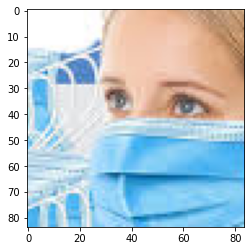

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
plt.imshow(io.imread('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1360.png'))

In [ ]:
get_class('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1029.png')

'WithoutMask'

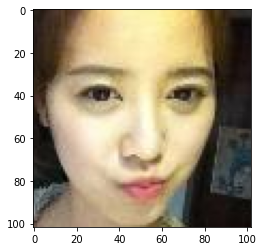

In [ ]:
plt.imshow(io.imread('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1029.png'))

In [ ]:
get_class('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1833.png')

'WithMask'

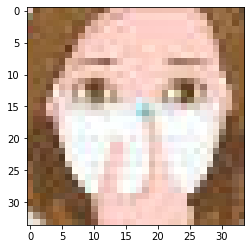

In [ ]:
plt.imshow(io.imread('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1833.png'))